# MUM 2023-24 Rozkłady ciągły, dyskretny i mieszany

In [1]:
%matplotlib inline
from src.rozklad_ciagly_dyskretny_mieszany import *

## Rozkład dyskretny

1. Rozkład dyskretny zdefiniowany jest na skończonej lub przeliczalnej liczbie punktów.
2. Każdy punkt ma określone prawdopodobieństwo. Jest to nieujemna liczba rzeczywista.
3. Wszystkie prawdopodobieństwa muszą sumować się do jedności.
4. Im większe prawdopodobieństwo punktu, tym częściej się on wylosuje. Im więcej punktów wylosujemy, tym bardziej liczba wylosowań danego punktu, podzielona przez liczbę wszystkich losowań przybliża prawdopodobieństwo tego punktu.
5. Punkty o prawdopodobieństwie równym zero nie wylosują się nigdy.

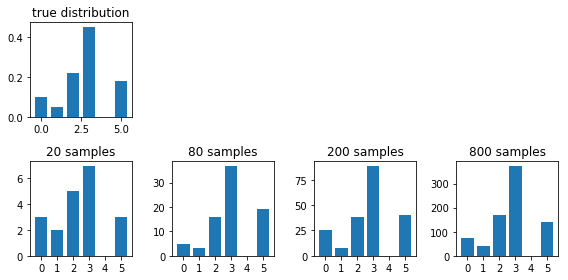

In [2]:
draw_discrete(
    probability=[.1, .05, .22, .45, 0., .18],
    n_samples=[20, 80, 200, 800],
)

## Rozkład ciągły

* Rozkład ciągły zdefiniowany jest na przestrzeni $\mathbb{R}^n$ (całej lub jej fragmencie).
* Zamiast prawdopodobieństwa mamy zdefiniowaną funkcję gęstości.
  * Gęstość jest nieujemna.
* Gęstość musi całkować się do jedności.
* Im większa gęstość w okolicy danego punktu, tym częściej przy próbkowaniu w okolicy tego punktu, wylosujemy sample.
* W dwa razy szerszym przedziale, który ma dwa razy mniejszą gęstość, wylosuje się mniej więcej tyle samo punktów, co w przedziale oryginalnym.
* Każdy punkt ma prawdopodobieństwo zero. Nie ma sensu mówić o prawdopodobieństwie punktu w kontekście samplowania.
* Żaden punkt nie wylosuje się dwa razy, nawet przy "nieskończenie wielu" losowaniach. Jeśli ustalimy pewien punkt, to on nie wylosuje się nigdy (ale trzeba wybrać przed rozpoczęciem losowania).
  * rzucając rzutką w prostą mamy zerowe prawdopodobieństwo trafienia w nią
* W przedziałach o prawdopodobieństwie zero punkty nie wylosują się nigdy.

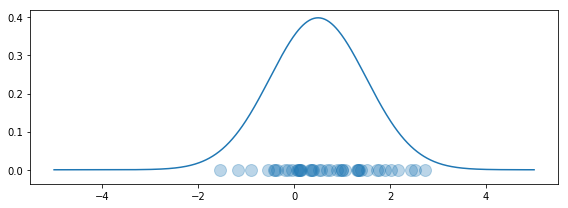

In [3]:
draw_normal(loc=.5, scale=1., n_samples=43)

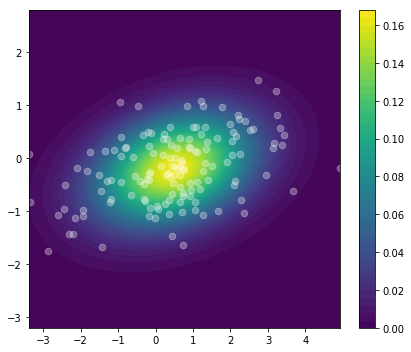

In [4]:
draw_normal_2d(mean=[0.5, -0.2], cov=[[2.0, 0.3], [0.3, 0.5]], n_samples=143)

### Rozkład normalny (Gaussa)

https://en.wikipedia.org/wiki/Normal_distribution

Co trzeba umieć i rozumieć:
* wzór na gęstość
* powiązanie gęstości z kształtem
* co robią parametry mean i variance (loc i scale)

https://en.wikipedia.org/wiki/Multivariate_normal_distribution

Co trzeba umieć i rozumieć:
* kształt (elipsoidalna górka)
* rozkłady brzegowe to rozkłady normalne

https://en.wikipedia.org/wiki/Mixture_distribution

Co trzeba umieć i rozumieć:
* jak wygląda gęstość mixture distribution
* jak wygląda samplowanie

### Rozkład jednostajny

Co trzeba umieć i rozumieć:
* to samo, co dla rozkładu normalnego

## Rozkład mieszany

W praktyce bardzo często będziemy używali kombinacji rozkładów ciągłych i dyskretnych. Zasada jest następująca:

1. Musimy mieć dobrze zdefiniowaną przestrzeń, z której losujemy. W powyższych przykładach tą przestrzenią był albo zbiór punktów (rozkład dyskretny), albo $\mathbb{R}^n$ (rozkład ciągły). Teraz możemy mieć dowolnie wiele punktów oraz fragmentów przestrzeni $\mathbb{R}^n$ dla różnych $n$.

2. Każdy fragment ma oddzielnie zdefiniowaną gęstość. Punkty mają zdefiniowane prawdopodobieństwa liczbowe.

3. Na fragmentach $\mathbb{R}^n$ liczymy $n$-wymiarową całkę - dla różnych $n$ są to różne całki. Na punktach sumujemy prawdopodobieństwa.

4. Gęstości __łącznie__ całkują się do jedności - to znaczy, że jeśli policzymy całkę na każdym fragmencie, a następnie zsumujemy te całki z prawdopodobieństwami punktów, to otrzymamy $1$.

5. Wartość liczbowa całki po danym fragmencie mówi, jak często losowy punkt pochodzi właśnie z tego fragmentu. W ramach fragmentu obowiązują zasady samplowania jak dla rozkładów ciągłych i dyskretnych.

## Przykład

* Może tak być, że wszystkie punkty leżą np. w przestrzeni $\mathbb{R}^2$, ale tak naprawdę ta przestrzeń podzielona jest na kilka kawałków.

* poniżej mamy cztery fragmenty:
  * czarny - 25% całego rozkładu, całka dwuwymiarowa na $(0, +\infty)^2$,
  * niebieski - 25% całego rozkładu, całka jednowymiarowa na $(0, +\infty) \times \{0\}$, gdzie przy całkowaniu "zapominamy" o drugiej współrzędnej,
  * czerwony - 25% całego rozkładu, całka jednowymiarowa na $\{0\} \times (0, +\infty)$, gdzie przy całkowaniu "zapominamy" o pierwszej współrzędnej,
  * zielony - pojedynczy punkt, którego prawdopodobieństwo wynosi 25%.
    * (dygresja - tak może wyglądać rozkład ciągły po transformacji funkcją aktywacji ReLU)

![proba](../ml_figures/Rozklad_ciagly_dyskretny_mieszany_proba.png)

* Możemy łatwo napisać samplowanie, które odpowiada sytuacji na rysunku:

In [5]:
sample_2d(n_samples=32)